In [1]:
import pandas as pd
import numpy as np
import os

In [7]:
lista = ['ene','feb','mar','abril','mayo','junio','julio','agosto','sept','oct','nov','dic']

In [8]:
data_2021 = pd.DataFrame()
j = 1
for i in lista:
    data_local_general = pd.read_excel('2021/General_departamental_'+ i +'.xlsx')
    data_local_xenofobia = pd.read_excel('2021/Xenofobia_departamental_'+ i +'.xlsx')
    data_local_general['mes'] = j
    j+=1
    data_local_xenofobia['año'] = 2021
    data_junta = pd.merge(data_local_xenofobia, data_local_general, how = 'right')
    data_2021 = data_2021.append(data_junta)
data_2021.fillna(0,inplace=True)
data_2021

Region  Xenofobia     año  General  mes
0                     Bogota, Colombia     1928.0  2021.0    17429    1
1                  Antioquia, Colombia      462.0  2021.0     3293    1
2            Valle del Cauca, Colombia      283.0  2021.0     1807    1
3                  Atlántico, Colombia      174.0  2021.0     1365    1
4                  Santander, Colombia      112.0  2021.0     1089    1
..                                 ...        ...     ...      ...  ...
24  San Andrés y Providencia, Colombia        1.0  2021.0       25   12
25                   Caquetá, Colombia        3.0  2021.0       20   12
26                     Chocó, Colombia        5.0  2021.0       18   12
27                  Guaviare, Colombia        0.0     0.0        4   12
28                  Putumayo, Colombia        0.0     0.0        1   12

[352 rows x 5 columns]

In [9]:
data_2021['tasa_xenofobia'] = data_2021['Xenofobia']/data_2021['General']
data_2021.to_excel('data_2021.xlsx')

In [15]:
data_2022 = pd.DataFrame()
j = 1
for i in lista[:-2]:
    data_local_general = pd.read_excel('2022/General_departamental_'+ i +'.xlsx')
    data_local_xenofobia = pd.read_excel('2022/Xenofobia_departamental_'+ i +'.xlsx')
    data_local_general['mes'] = j
    j+=1
    data_local_xenofobia['año'] = 2022
    print(i)
    data_junta = pd.merge(data_local_xenofobia, data_local_general, how = 'right',left_on='Region',right_on='Region')
    data_2022 = data_2022.append(data_junta)
data_2022.fillna(0,inplace=True)
data_2022

ene
feb
mar
abril
mayo
junio
julio
agosto
sept
oct


Region  Xenofobia     año  General  mes
0                     Bogota, Colombia     2087.0  2022.0    18522    1
1                  Antioquia, Colombia      718.0  2022.0     4443    1
2            Valle del Cauca, Colombia      317.0  2022.0     2195    1
3                  Atlántico, Colombia      227.0  2022.0     1435    1
4                  Santander, Colombia      153.0  2022.0     1228    1
..                                 ...        ...     ...      ...  ...
25                   Caquetá, Colombia        2.0  2022.0       30   10
26  San Andrés y Providencia, Colombia        4.0  2022.0       25   10
27                  Guaviare, Colombia        0.0     0.0        5   10
28                  Putumayo, Colombia        0.0     0.0        2   10
29                   Vichada, Colombia        0.0     0.0        2   10

[294 rows x 5 columns]

In [16]:
data_2022['tasa_xenofobia'] = data_2022['Xenofobia']/data_2022['General']
data_2022.to_excel('data_2022.xlsx')

# Análisis descriptivo
Obtener las 5 gráficas esenciales.

In [16]:
import pandas as pd
import numpy as np
import os
import re
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
from jupyterthemes import jtplot
# Fondo oscuro
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
# Fondo blanco
jtplot.style(theme='grade3', context='notebook', ticks=True, grid=True)
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
base_2022 = pd.read_excel(r'C:\Users\JOSE\Desktop\Trabajo\BX\Xenofobia Per cápita\Base_final_xenofobia_per_capita_2022.xlsx')
base_2022

Xenofobia   año  General  mes  tasa_xenofobia departamento  coddepto  \
0          692  2022     5064    6        0.136651    ANTIOQUIA         5   
1          716  2022     5913    4        0.121089    ANTIOQUIA         5   
2          718  2022     4443    1        0.161603    ANTIOQUIA         5   
3          949  2022     7643    5        0.124166    ANTIOQUIA         5   
4          527  2022     3513    8        0.150014    ANTIOQUIA         5   
..         ...   ...      ...  ...             ...          ...       ...   
291          0     0        1    3        0.000000      VICHADA        99   
292          0     0        1    4        0.000000      VICHADA        99   
293          0     0        2    8        0.000000      VICHADA        99   
294          0     0        0    0        0.000000     AMAZONAS        91   
295          0     0        0    0        0.000000       VAUPES        97   

     pobl_tot  tasa_xenofobia_per_capita  tasa_xenofobia_cada_1000_habitantes  
0     6677930                   0.000104                             0.103625  
1     6677930                   0.000107                             0.107219  
2     6677930                   0.000108                             0.107518  
3     6677930                   0.000142                             0.142110  
4     6677930                   0.000079                             0.078917  
..        ...                        ...                                  ...  
291    112958                   0.000000                             0.000000  
292    112958                   0.000000                             0.000000  
293    112958                   0.000000                             0.000000  
294     79020                   0.000000                             0.000000  
295     44712                   0.000000                             0.000000  

[296 rows x 10 columns]

In [63]:
base_2022 = base_2022[base_2022['año'] != 0]
base_2022.sort_values(by=['departamento','mes'], inplace=True)
base_2022

C:\Users\JOSE\anaconda3\envs\nltkenv\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Xenofobia   año  General  mes  tasa_xenofobia     departamento  coddepto  \
2          718  2022     4443    1        0.161603        ANTIOQUIA         5   
5          647  2022     5326    2        0.121480        ANTIOQUIA         5   
6          595  2022     5828    3        0.102093        ANTIOQUIA         5   
1          716  2022     5913    4        0.121089        ANTIOQUIA         5   
3          949  2022     7643    5        0.124166        ANTIOQUIA         5   
..         ...   ...      ...  ...             ...              ...       ...   
287        307  2022     2278    6        0.134767  VALLE DEL CAUCA        76   
283        169  2022     1513    7        0.111699  VALLE DEL CAUCA        76   
286        199  2022     1638    8        0.121490  VALLE DEL CAUCA        76   
285        112  2022     1013    9        0.110563  VALLE DEL CAUCA        76   
289        378  2022     2671   10        0.141520  VALLE DEL CAUCA        76   

     pobl_tot  tasa_xenofobia_per_capita  tasa_xenofobia_cada_1000_habitantes  
2     6677930                   0.000108                             0.107518  
5     6677930                   0.000097                             0.096886  
6     6677930                   0.000089                             0.089099  
1     6677930                   0.000107                             0.107219  
3     6677930                   0.000142                             0.142110  
..        ...                        ...                                  ...  
287   4532152                   0.000068                             0.067738  
283   4532152                   0.000037                             0.037289  
286   4532152                   0.000044                             0.043909  
285   4532152                   0.000025                             0.024712  
289   4532152                   0.000083                             0.083404  

[270 rows x 10 columns]

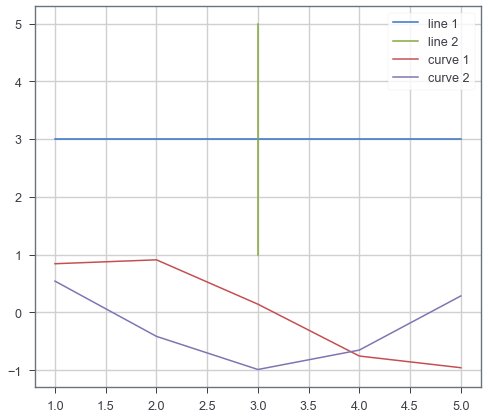

In [64]:
x = [1,2,3,4,5]
y = [3,3,3,3,3]
plt.plot(x, y, label = "line 1")
plt.plot(y, x, label = "line 2")
plt.plot(x, np.sin(x), label = "curve 1")
plt.plot(x, np.cos(x), label = "curve 2")
plt.legend()
plt.show()

In [65]:
data_grafico_1 = base_2022.sort_values(by=['pobl_tot'], ascending=False)
data_grafico_1 = data_grafico_1[data_grafico_1['departamento'].isin(['BOGOTA', 'ANTIOQUIA', 'VALLE DEL CAUCA', 'CUNDINAMARCA', 'ATLANTICO'])]
data_grafico_1 = data_grafico_1.sort_values(by=['departamento','mes'], ascending=True)
print(data_grafico_1['departamento'].unique())
data_grafico_1

['ANTIOQUIA' 'ATLANTICO' 'BOGOTA' 'CUNDINAMARCA' 'VALLE DEL CAUCA']


Xenofobia   año  General  mes  tasa_xenofobia     departamento  coddepto  \
2          718  2022     4443    1        0.161603        ANTIOQUIA         5   
5          647  2022     5326    2        0.121480        ANTIOQUIA         5   
6          595  2022     5828    3        0.102093        ANTIOQUIA         5   
1          716  2022     5913    4        0.121089        ANTIOQUIA         5   
3          949  2022     7643    5        0.124166        ANTIOQUIA         5   
0          692  2022     5064    6        0.136651        ANTIOQUIA         5   
7          614  2022     3571    7        0.171941        ANTIOQUIA         5   
4          527  2022     3513    8        0.150014        ANTIOQUIA         5   
8          283  2022     2058    9        0.137512        ANTIOQUIA         5   
9          863  2022     6015   10        0.143475        ANTIOQUIA         5   
27         227  2022     1435    1        0.158188        ATLANTICO         8   
20         238  2022     1931    2        0.123252        ATLANTICO         8   
29         312  2022     2063    3        0.151236        ATLANTICO         8   
23         304  2022     1977    4        0.153768        ATLANTICO         8   
24         496  2022     2740    5        0.181022        ATLANTICO         8   
25         381  2022     2043    6        0.186490        ATLANTICO         8   
26         314  2022     1683    7        0.186572        ATLANTICO         8   
21         310  2022     1450    8        0.213793        ATLANTICO         8   
28         148  2022      796    9        0.185930        ATLANTICO         8   
22         536  2022     2571   10        0.208479        ATLANTICO         8   
37        2087  2022    18522    1        0.112677           BOGOTA        11   
31        2165  2022    25545    2        0.084752           BOGOTA        11   
30        1786  2022    25598    3        0.069771           BOGOTA        11   
35        2620  2022    23221    4        0.112829           BOGOTA        11   
39        4556  2022    29590    5        0.153971           BOGOTA        11   
32        2175  2022    22104    6        0.098398           BOGOTA        11   
34        1409  2022    16076    7        0.087646           BOGOTA        11   
33        1327  2022    16940    8        0.078335           BOGOTA        11   
38         988  2022     9973    9        0.099067           BOGOTA        11   
36        2586  2022    26666   10        0.096977           BOGOTA        11   
135         40  2022      237    1        0.168776     CUNDINAMARCA        25   
133         38  2022      266    2        0.142857     CUNDINAMARCA        25   
131         30  2022      271    3        0.110701     CUNDINAMARCA        25   
130         35  2022      252    4        0.138889     CUNDINAMARCA        25   
132         69  2022      341    5        0.202346     CUNDINAMARCA        25   
139         28  2022      231    6        0.121212     CUNDINAMARCA        25   
136         28  2022      198    7        0.141414     CUNDINAMARCA        25   
137         20  2022      180    8        0.111111     CUNDINAMARCA        25   
134          6  2022      121    9        0.049587     CUNDINAMARCA        25   
138         87  2022      389   10        0.223650     CUNDINAMARCA        25   
284        317  2022     2195    1        0.144419  VALLE DEL CAUCA        76   
288        315  2022     2695    2        0.116883  VALLE DEL CAUCA        76   
282        323  2022     2868    3        0.112622  VALLE DEL CAUCA        76   
281        433  2022     2483    4        0.174386  VALLE DEL CAUCA        76   
280        645  2022     3475    5        0.185612  VALLE DEL CAUCA        76   
287        307  2022     2278    6        0.134767  VALLE DEL CAUCA        76   
283        169  2022     1513    7        0.111699  VALLE DEL CAUCA        76   
286        199  2022     1638    8        0.121490  VALLE DEL CAUCA        76   
285        112  2022     1013    9  

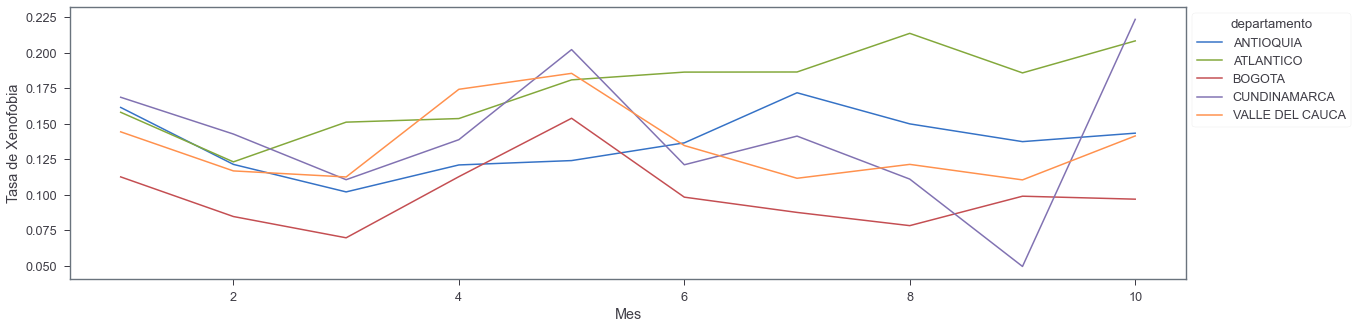

In [66]:
plt.figure(figsize=(20,5))
lines = sns.lineplot(data=data_grafico_1, x="mes", y="tasa_xenofobia", hue="departamento")
sns.move_legend(lines, "upper left", bbox_to_anchor=(1, 1))
#trat = sns.scatterplot(x="Treated", y= "y_coord", data=base_nodos)
#ax2 = ax.twinx()
#cont = sns.scatterplot(x="Control", y= "y_coord", data=base_nodos, ax=ax2)
#plt.axvline(x = 0, color = 'b', label = '')
# add label to the axis and label to the plot
#for i in range(len(Short_name)):
    #plt.annotate(Short_name[i], (base_nodos['Treated'][i]-0.15, base_nodos['y_coord'][i]-0.01) )
   # plt.annotate(Short_name[i], (base_nodos['Control'][i]+0.05, base_nodos['y_coord'][i]-0.01) )
lines.set(xlabel = "Mes", ylabel = 'Tasa de Xenofobia')
#cont.set( ylabel = '')
plt.grid(False)
#ax2.grid(False)

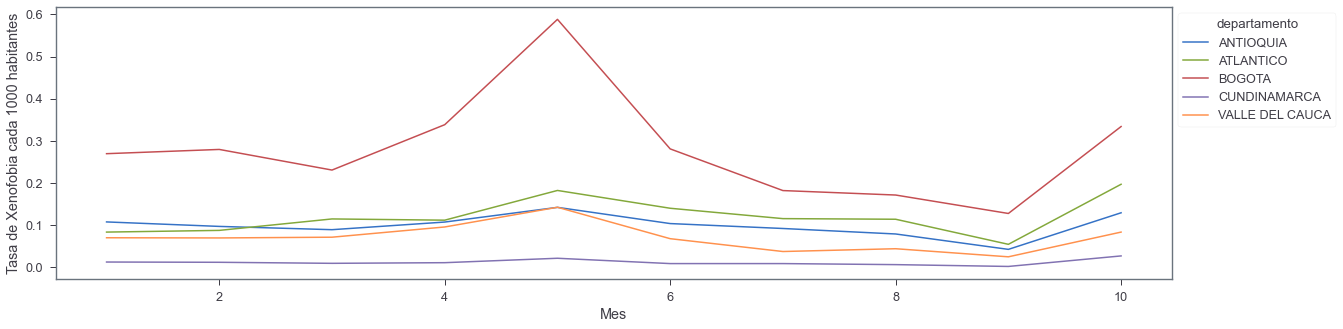

In [67]:
plt.figure(figsize=(20,5))
lines = sns.lineplot(data=data_grafico_1, x="mes", y="tasa_xenofobia_cada_1000_habitantes", hue="departamento")
sns.move_legend(lines, "upper left", bbox_to_anchor=(1, 1))
#trat = sns.scatterplot(x="Treated", y= "y_coord", data=base_nodos)
#ax2 = ax.twinx()
#cont = sns.scatterplot(x="Control", y= "y_coord", data=base_nodos, ax=ax2)
#plt.axvline(x = 0, color = 'b', label = '')
# add label to the axis and label to the plot
#for i in range(len(Short_name)):
    #plt.annotate(Short_name[i], (base_nodos['Treated'][i]-0.15, base_nodos['y_coord'][i]-0.01) )
   # plt.annotate(Short_name[i], (base_nodos['Control'][i]+0.05, base_nodos['y_coord'][i]-0.01) )
lines.set(xlabel = "Mes", ylabel = 'Tasa de Xenofobia cada 1000 habitantes')
#cont.set( ylabel = '')
plt.grid(False)
#ax2.grid(False)

In [81]:
base_grafica_3 = base_2022.groupby(['departamento']).mean()
base_grafica_3 = base_grafica_3.sort_values(by=['tasa_xenofobia'], ascending=False) 
base_grafica_3 = base_grafica_3[0:5] 
base_grafica_3.head(10)

Xenofobia     año      General       mes  \
departamento                                                          
PUTUMAYO                    1.000000  2022.0     3.000000  5.000000   
GUAVIARE                    1.333333  2022.0     5.000000  6.000000   
ATLANTICO                 326.600000  2022.0  1868.900000  5.500000   
SAN ANDRES Y PROVIDENCIA    3.666667  2022.0    27.333333  5.222222   
CUNDINAMARCA               38.100000  2022.0   248.600000  5.500000   

                          tasa_xenofobia  coddepto   pobl_tot  \
departamento                                                    
PUTUMAYO                        0.600000      86.0   359127.0   
GUAVIARE                        0.370370      95.0    86657.0   
ATLANTICO                       0.174873       8.0  2722128.0   
SAN ANDRES Y PROVIDENCIA        0.146974      88.0    63692.0   
CUNDINAMARCA                    0.141054      25.0  3242999.0   

                          tasa_xenofobia_per_capita  \
departamento                                          
PUTUMAYO                                   0.000003   
GUAVIARE                                   0.000015   
ATLANTICO                                  0.000120   
SAN ANDRES Y PROVIDENCIA                   0.000058   
CUNDINAMARCA                               0.000012   

                          tasa_xenofobia_cada_1000_habitantes  
departamento                                                   
PUTUMAYO                                             0.002785  
GUAVIARE                                             0.015386  
ATLANTICO                                            0.119980  
SAN ANDRES Y PROVIDENCIA                             0.057569  
CUNDINAMARCA                                         0.011748

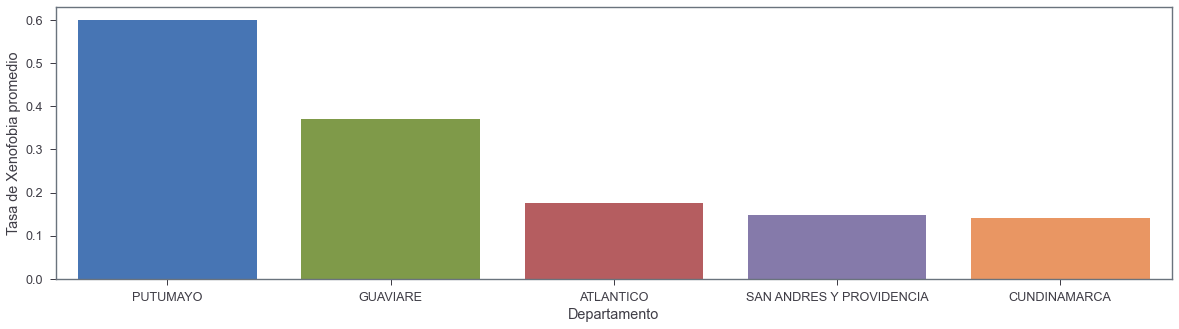

In [84]:
plt.figure(figsize=(20,5))
lines = sns.barplot(data=base_grafica_3, x=base_grafica_3.index, y="tasa_xenofobia")
#sns.move_legend(lines, "upper left", bbox_to_anchor=(1, 1))
#trat = sns.scatterplot(x="Treated", y= "y_coord", data=base_nodos)
#ax2 = ax.twinx()
#cont = sns.scatterplot(x="Control", y= "y_coord", data=base_nodos, ax=ax2)
#plt.axvline(x = 0, color = 'b', label = '')
# add label to the axis and label to the plot
#for i in range(len(Short_name)):
    #plt.annotate(Short_name[i], (base_nodos['Treated'][i]-0.15, base_nodos['y_coord'][i]-0.01) )
   # plt.annotate(Short_name[i], (base_nodos['Control'][i]+0.05, base_nodos['y_coord'][i]-0.01) )
lines.set(xlabel = "Departamento", ylabel = 'Tasa de Xenofobia promedio')
#cont.set( ylabel = '')
plt.grid(False)
#ax2.grid(False)

In [85]:
base_grafica_3 = base_2022.groupby(['departamento']).mean()
base_grafica_3 = base_grafica_3.sort_values(by=['tasa_xenofobia_cada_1000_habitantes'], ascending=False) 
base_grafica_3 = base_grafica_3[0:5] 
base_grafica_3.head(10)

Xenofobia     año  General  mes  tasa_xenofobia  coddepto  \
departamento                                                                 
BOGOTA              2169.9  2022.0  21423.5  5.5        0.099442      11.0   
ATLANTICO            326.6  2022.0   1868.9  5.5        0.174873       8.0   
ANTIOQUIA            660.4  2022.0   4937.4  5.5        0.137002       5.0   
VALLE DEL CAUCA      319.8  2022.0   2282.9  5.5        0.135396      76.0   
SANTANDER            158.2  2022.0   1264.1  5.5        0.118891      68.0   

                  pobl_tot  tasa_xenofobia_per_capita  \
departamento                                            
BOGOTA           7743955.0                   0.000280   
ATLANTICO        2722128.0                   0.000120   
ANTIOQUIA        6677930.0                   0.000099   
VALLE DEL CAUCA  4532152.0                   0.000071   
SANTANDER        2280908.0                   0.000069   

                 tasa_xenofobia_cada_1000_habitantes  
departamento                                          
BOGOTA                                      0.280206  
ATLANTICO                                   0.119980  
ANTIOQUIA                                   0.098893  
VALLE DEL CAUCA                             0.070563  
SANTANDER                                   0.069358

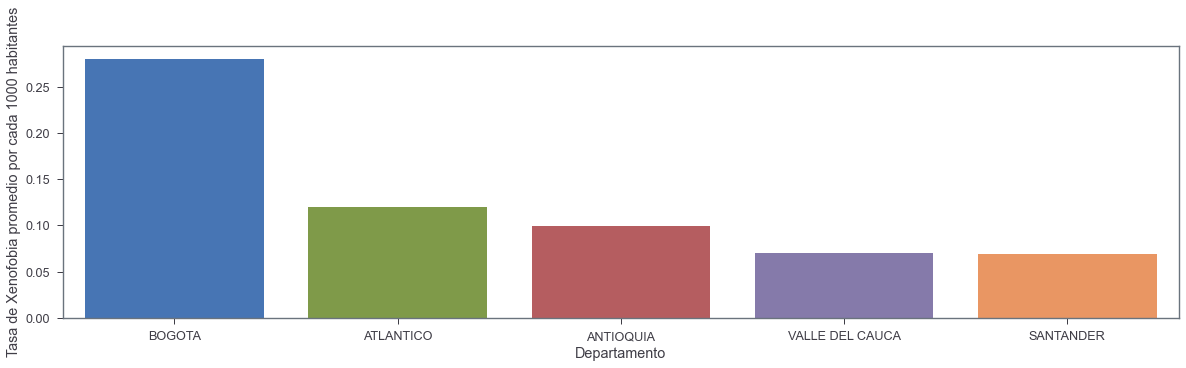

In [87]:
plt.figure(figsize=(20,5))
lines = sns.barplot(data=base_grafica_3, x=base_grafica_3.index, y="tasa_xenofobia_cada_1000_habitantes")
#sns.move_legend(lines, "upper left", bbox_to_anchor=(1, 1))
#trat = sns.scatterplot(x="Treated", y= "y_coord", data=base_nodos)
#ax2 = ax.twinx()
#cont = sns.scatterplot(x="Control", y= "y_coord", data=base_nodos, ax=ax2)
#plt.axvline(x = 0, color = 'b', label = '')
# add label to the axis and label to the plot
#for i in range(len(Short_name)):
    #plt.annotate(Short_name[i], (base_nodos['Treated'][i]-0.15, base_nodos['y_coord'][i]-0.01) )
   # plt.annotate(Short_name[i], (base_nodos['Control'][i]+0.05, base_nodos['y_coord'][i]-0.01) )
lines.set(xlabel = "Departamento", ylabel = 'Tasa de Xenofobia promedio por cada 1000 habitantes')
#cont.set( ylabel = '')
plt.grid(False)
#ax2.grid(False)

In [88]:
base_grafica_3 = base_2022.groupby(['departamento']).mean()
base_grafica_3 = base_grafica_3.sort_values(by=['Xenofobia'], ascending=False) 
base_grafica_3 = base_grafica_3[0:5] 
base_grafica_3.head(10)

Xenofobia     año  General  mes  tasa_xenofobia  coddepto  \
departamento                                                                 
BOGOTA              2169.9  2022.0  21423.5  5.5        0.099442      11.0   
ANTIOQUIA            660.4  2022.0   4937.4  5.5        0.137002       5.0   
ATLANTICO            326.6  2022.0   1868.9  5.5        0.174873       8.0   
VALLE DEL CAUCA      319.8  2022.0   2282.9  5.5        0.135396      76.0   
SANTANDER            158.2  2022.0   1264.1  5.5        0.118891      68.0   

                  pobl_tot  tasa_xenofobia_per_capita  \
departamento                                            
BOGOTA           7743955.0                   0.000280   
ANTIOQUIA        6677930.0                   0.000099   
ATLANTICO        2722128.0                   0.000120   
VALLE DEL CAUCA  4532152.0                   0.000071   
SANTANDER        2280908.0                   0.000069   

                 tasa_xenofobia_cada_1000_habitantes  
departamento                                          
BOGOTA                                      0.280206  
ANTIOQUIA                                   0.098893  
ATLANTICO                                   0.119980  
VALLE DEL CAUCA                             0.070563  
SANTANDER                                   0.069358

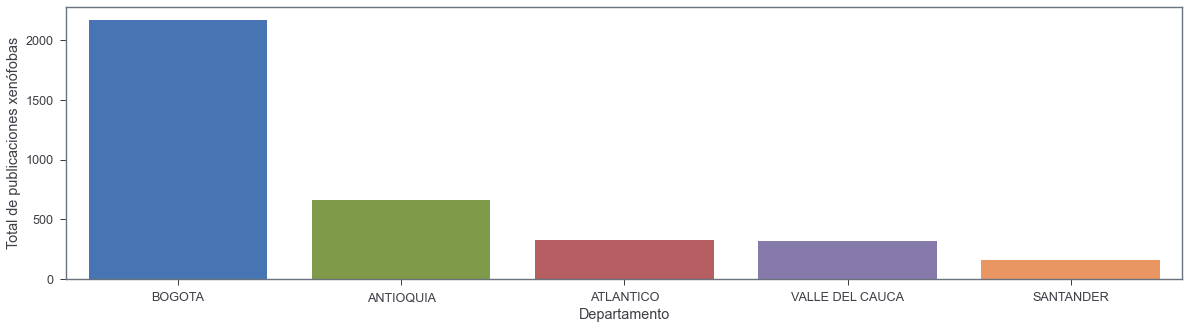

In [89]:
plt.figure(figsize=(20,5))
lines = sns.barplot(data=base_grafica_3, x=base_grafica_3.index, y="Xenofobia")
#sns.move_legend(lines, "upper left", bbox_to_anchor=(1, 1))
#trat = sns.scatterplot(x="Treated", y= "y_coord", data=base_nodos)
#ax2 = ax.twinx()
#cont = sns.scatterplot(x="Control", y= "y_coord", data=base_nodos, ax=ax2)
#plt.axvline(x = 0, color = 'b', label = '')
# add label to the axis and label to the plot
#for i in range(len(Short_name)):
    #plt.annotate(Short_name[i], (base_nodos['Treated'][i]-0.15, base_nodos['y_coord'][i]-0.01) )
   # plt.annotate(Short_name[i], (base_nodos['Control'][i]+0.05, base_nodos['y_coord'][i]-0.01) )
lines.set(xlabel = "Departamento", ylabel = 'Total de publicaciones xenófobas')
#cont.set( ylabel = '')
plt.grid(False)
#ax2.grid(False)

In [93]:
data_grafico_1 = base_2022.sort_values(by=['Xenofobia'], ascending=False)
print(data_grafico_1['departamento'].unique())
print(data_grafico_1)
data_grafico_1 = data_grafico_1[data_grafico_1['departamento'].isin(['BOGOTA', 'ANTIOQUIA', 'VALLE DEL CAUCA', 'ATLANTICO', 'SANTANDER'])]
data_grafico_1 = data_grafico_1.sort_values(by=['departamento','mes'], ascending=True)
print(data_grafico_1['departamento'].unique())
data_grafico_1

['BOGOTA' 'ANTIOQUIA' 'VALLE DEL CAUCA' 'ATLANTICO' 'SANTANDER' 'BOLIVAR'
 'RISARALDA' 'NORTE DE SANTANDER' 'CUNDINAMARCA' 'MAGDALENA' 'CESAR'
 'CALDAS' 'CORDOBA' 'META' 'BOYACA' 'TOLIMA' 'QUINDIO' 'HUILA' 'NARINO'
 'SUCRE' 'CAUCA' 'LA GUAJIRA' 'CASANARE' 'CAQUETA'
 'SAN ANDRES Y PROVIDENCIA' 'ARAUCA' 'CHOCO' 'GUAVIARE' 'PUTUMAYO']
     Xenofobia   año  General  mes  tasa_xenofobia              departamento  \
39        4556  2022    29590    5        0.153971                    BOGOTA   
35        2620  2022    23221    4        0.112829                    BOGOTA   
36        2586  2022    26666   10        0.096977                    BOGOTA   
32        2175  2022    22104    6        0.098398                    BOGOTA   
31        2165  2022    25545    2        0.084752                    BOGOTA   
..         ...   ...      ...  ...             ...                       ...   
75           1  2022       25    6        0.040000                   CAQUETA   
113          1  2022      

Xenofobia   año  General  mes  tasa_xenofobia     departamento  coddepto  \
2          718  2022     4443    1        0.161603        ANTIOQUIA         5   
5          647  2022     5326    2        0.121480        ANTIOQUIA         5   
6          595  2022     5828    3        0.102093        ANTIOQUIA         5   
1          716  2022     5913    4        0.121089        ANTIOQUIA         5   
3          949  2022     7643    5        0.124166        ANTIOQUIA         5   
0          692  2022     5064    6        0.136651        ANTIOQUIA         5   
7          614  2022     3571    7        0.171941        ANTIOQUIA         5   
4          527  2022     3513    8        0.150014        ANTIOQUIA         5   
8          283  2022     2058    9        0.137512        ANTIOQUIA         5   
9          863  2022     6015   10        0.143475        ANTIOQUIA         5   
27         227  2022     1435    1        0.158188        ATLANTICO         8   
20         238  2022     1931    2        0.123252        ATLANTICO         8   
29         312  2022     2063    3        0.151236        ATLANTICO         8   
23         304  2022     1977    4        0.153768        ATLANTICO         8   
24         496  2022     2740    5        0.181022        ATLANTICO         8   
25         381  2022     2043    6        0.186490        ATLANTICO         8   
26         314  2022     1683    7        0.186572        ATLANTICO         8   
21         310  2022     1450    8        0.213793        ATLANTICO         8   
28         148  2022      796    9        0.185930        ATLANTICO         8   
22         536  2022     2571   10        0.208479        ATLANTICO         8   
37        2087  2022    18522    1        0.112677           BOGOTA        11   
31        2165  2022    25545    2        0.084752           BOGOTA        11   
30        1786  2022    25598    3        0.069771           BOGOTA        11   
35        2620  2022    23221    4        0.112829           BOGOTA        11   
39        4556  2022    29590    5        0.153971           BOGOTA        11   
32        2175  2022    22104    6        0.098398           BOGOTA        11   
34        1409  2022    16076    7        0.087646           BOGOTA        11   
33        1327  2022    16940    8        0.078335           BOGOTA        11   
38         988  2022     9973    9        0.099067           BOGOTA        11   
36        2586  2022    26666   10        0.096977           BOGOTA        11   
257        153  2022     1228    1        0.124593        SANTANDER        68   
253        302  2022     2019    2        0.149579        SANTANDER        68   
256        174  2022     1563    3        0.111324        SANTANDER        68   
250        197  2022     1281    4        0.153786        SANTANDER        68   
254        290  2022     1764    5        0.164399        SANTANDER        68   
255        121  2022     1370    6        0.088321        SANTANDER        68   
259         79  2022      791    7        0.099874        SANTANDER        68   
252         79  2022      836    8        0.094498        SANTANDER        68   
251         42  2022      443    9        0.094808        SANTANDER        68   
258        145  2022     1346   10        0.107727        SANTANDER        68   
284        317  2022     2195    1        0.144419  VALLE DEL CAUCA        76   
288        315  2022     2695    2        0.116883  VALLE DEL CAUCA        76   
282        323  2022     2868    3        0.112622  VALLE DEL CAUCA        76   
281        433  2022     2483    4        0.174386  VALLE DEL CAUCA        76   
280        645  2022     3475    5        0.185612  VALLE DEL CAUCA        76   
287        307  2022     2278    6        0.134767  VALLE DEL CAUCA        76   
283        169  2022     1513    7        0.111699  VALLE DEL CAUCA        76   
286        199  2022     1638    8        0.121490  VALLE DEL CAUCA        76   
285        112  2022     1013    9  

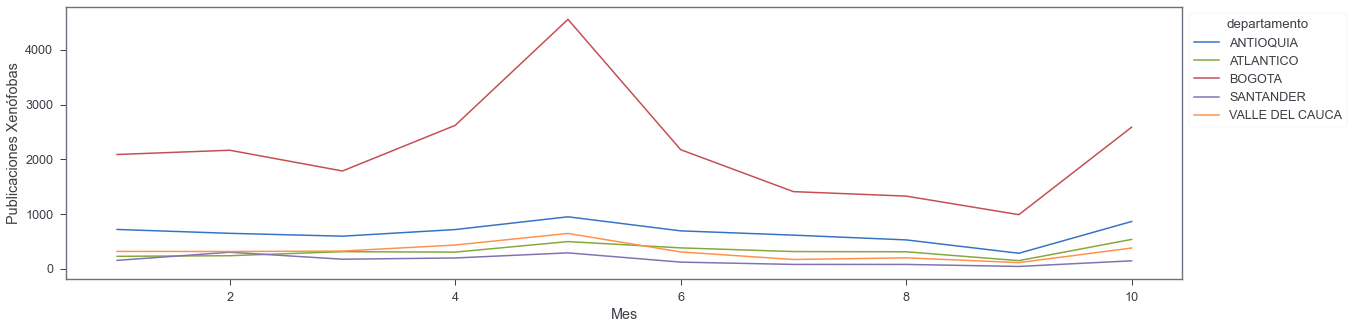

In [96]:
plt.figure(figsize=(20,5))
lines = sns.lineplot(data=data_grafico_1, x="mes", y="Xenofobia", hue="departamento")
sns.move_legend(lines, "upper left", bbox_to_anchor=(1, 1))
#trat = sns.scatterplot(x="Treated", y= "y_coord", data=base_nodos)
#ax2 = ax.twinx()
#cont = sns.scatterplot(x="Control", y= "y_coord", data=base_nodos, ax=ax2)
#plt.axvline(x = 0, color = 'b', label = '')
# add label to the axis and label to the plot
#for i in range(len(Short_name)):
    #plt.annotate(Short_name[i], (base_nodos['Treated'][i]-0.15, base_nodos['y_coord'][i]-0.01) )
   # plt.annotate(Short_name[i], (base_nodos['Control'][i]+0.05, base_nodos['y_coord'][i]-0.01) )
lines.set(xlabel = "Mes", ylabel = 'Publicaciones Xenófobas')
#cont.set( ylabel = '')
plt.grid(False)
#ax2.grid(False)